In [1]:
import pandas as pd
import numpy as np
import copy
from math import sqrt

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [3]:
import re

In [4]:
df = pd.read_csv('15minute_data_austin.csv')

In [5]:
df

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,661,2018-11-21 15:15:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.915,124.277
1,661,2018-11-21 15:30:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.959,124.293
2,661,2018-11-21 15:45:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.886,124.240
3,661,2018-11-21 16:00:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.880,124.175
4,661,2018-11-21 16:15:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.633,124.226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873281,9278,2018-12-31 22:45:00-06,0.042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.033,123.293
873282,9278,2018-12-31 23:00:00-06,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.991,123.429
873283,9278,2018-12-31 23:15:00-06,0.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.024,123.451
873284,9278,2018-12-31 23:30:00-06,0.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.027,123.433


In [6]:
df.local_15min = pd.to_datetime(df.local_15min)
df.set_index(['dataid', 'local_15min'], inplace = True)

#df.index = pd.MultiIndex.from_arrays([df.index.date, df.index.time], names=['Date','Time'])


dataframe_dict = {ind : pd.DataFrame for ind in df.index.unique(level = 0)}

for key in dataframe_dict.keys():
    dataframe_dict[key] = df.loc[key] 
    dataframe_dict[key].dropna(axis=1, how='all', inplace = True)
    dataframe_dict[key].fillna(method = 'bfill', inplace = True)
    dataframe_dict[key]['date_time'] = dataframe_dict[key].index
    dataframe_dict[key]['date'] = dataframe_dict[key]['date_time'].apply(lambda x: x.date())
    dataframe_dict[key]['time'] = dataframe_dict[key]['date_time'].apply(lambda x: x.time())

In [7]:
#for key in dataframe_dict.keys():    
#    dataframe_dict[key].drop('date_time', axis = 1, inplace = True)

In [8]:
dataframe_dict.keys()

dict_keys([661, 1642, 2335, 2361, 2818, 3039, 3456, 3538, 4031, 4373, 4767, 5746, 6139, 7536, 7719, 7800, 7901, 7951, 8156, 8386, 8565, 9019, 9160, 9922, 9278])

In [9]:
for key in dataframe_dict.keys():
    print(dataframe_dict[key].columns)

Index(['air1', 'bathroom1', 'car1', 'clotheswasher1', 'dishwasher1',
       'disposal1', 'drye1', 'furnace1', 'grid', 'kitchenapp1', 'kitchenapp2',
       'microwave1', 'refrigerator1', 'solar', 'leg1v', 'leg2v', 'date_time',
       'date', 'time'],
      dtype='object')
Index(['air1', 'bathroom1', 'car1', 'clotheswasher1', 'dishwasher1', 'drye1',
       'dryg1', 'furnace1', 'grid', 'kitchenapp1', 'kitchenapp2',
       'livingroom1', 'microwave1', 'oven1', 'refrigerator1', 'solar',
       'utilityroom1', 'venthood1', 'leg1v', 'leg2v', 'date_time', 'date',
       'time'],
      dtype='object')
Index(['air1', 'car1', 'clotheswasher1', 'dishwasher1', 'disposal1', 'drye1',
       'furnace1', 'grid', 'kitchenapp1', 'kitchenapp2', 'microwave1', 'oven1',
       'oven2', 'refrigerator1', 'solar', 'venthood1', 'leg1v', 'leg2v',
       'date_time', 'date', 'time'],
      dtype='object')
Index(['air1', 'bathroom1', 'clotheswasher1', 'dishwasher1', 'disposal1',
       'drye1', 'dryg1', 'freezer1',

In [10]:
print('There are {first} agents in the dataframe'.format(first = len(dataframe_dict.keys())))
print('-----------------------------------------')
for ind, key in enumerate(dataframe_dict.keys()):
    print('Home #{first} has {second} active columns'.format(first = key, second = len(dataframe_dict[key].columns)))

There are 25 agents in the dataframe
-----------------------------------------
Home #661 has 19 active columns
Home #1642 has 23 active columns
Home #2335 has 21 active columns
Home #2361 has 22 active columns
Home #2818 has 22 active columns
Home #3039 has 21 active columns
Home #3456 has 22 active columns
Home #3538 has 22 active columns
Home #4031 has 20 active columns
Home #4373 has 22 active columns
Home #4767 has 18 active columns
Home #5746 has 25 active columns
Home #6139 has 23 active columns
Home #7536 has 21 active columns
Home #7719 has 21 active columns
Home #7800 has 21 active columns
Home #7901 has 20 active columns
Home #7951 has 20 active columns
Home #8156 has 21 active columns
Home #8386 has 21 active columns
Home #8565 has 20 active columns
Home #9019 has 19 active columns
Home #9160 has 15 active columns
Home #9922 has 25 active columns
Home #9278 has 22 active columns


In [11]:
for ind, key in enumerate(dataframe_dict.keys()):
    print('Home #{first} has the following facilities:'.format(first = key))
    print(dataframe_dict[key].columns.tolist())
    print('-----------------------------------')

Home #661 has the following facilities:
['air1', 'bathroom1', 'car1', 'clotheswasher1', 'dishwasher1', 'disposal1', 'drye1', 'furnace1', 'grid', 'kitchenapp1', 'kitchenapp2', 'microwave1', 'refrigerator1', 'solar', 'leg1v', 'leg2v', 'date_time', 'date', 'time']
-----------------------------------
Home #1642 has the following facilities:
['air1', 'bathroom1', 'car1', 'clotheswasher1', 'dishwasher1', 'drye1', 'dryg1', 'furnace1', 'grid', 'kitchenapp1', 'kitchenapp2', 'livingroom1', 'microwave1', 'oven1', 'refrigerator1', 'solar', 'utilityroom1', 'venthood1', 'leg1v', 'leg2v', 'date_time', 'date', 'time']
-----------------------------------
Home #2335 has the following facilities:
['air1', 'car1', 'clotheswasher1', 'dishwasher1', 'disposal1', 'drye1', 'furnace1', 'grid', 'kitchenapp1', 'kitchenapp2', 'microwave1', 'oven1', 'oven2', 'refrigerator1', 'solar', 'venthood1', 'leg1v', 'leg2v', 'date_time', 'date', 'time']
-----------------------------------
Home #2361 has the following faciliti

In [12]:
import urllib

link = "https://docs.google.com/document/d/e/2PACX-1vT96LpQBvXjJqsSkHUAIyAfteggX2X4ZJPsO-5PgWZNVvHFW3TeFRtFL9MQift_zDaPGdSp-bGNfZ-4/pub"
f = urllib.request.urlopen(link)
myfile = f.read()

res = []
for key in dataframe_dict.keys():
    res += dataframe_dict[key].columns.tolist()

res = set(res)

string = str(myfile) 
for elem in res:
    try:
        if elem == 'solar':
            pattern = '(' + elem + ')' + '(?=<\/span>)(.*?)(?<=">[A-Z,e])(.*?)(?=.<\/span><\/p>)'
        #else:
        pattern = '(' + elem + ')' + '(?=<\/span>)(.*?)(?<=">[A-Z,e])(.*?)(?=.<\/span><\/p>)'
        result = re.search(pattern, str(myfile))
        print(result.groups()[0], ':', result.groups()[1][-1] + result.groups()[-1])
        print('---------------------------------------')
    except AttributeError:
        print('Error in element', elem)

lights_plugs3 : Third general lighting and plugs circuit eGauge data present. This type of circuit includes lights, fans, and wall outlets, often from multiple rooms in the home
---------------------------------------
diningroom1 : Dining room circuit eGauge data present. This type of circuit includes only lights, fans, and wall outlets
---------------------------------------
bedroom2 : Second bedroom circuit eGauge data present. This type of circuit includes only lights, fans, and wall outlets
---------------------------------------
winecooler1 : Wine cooler circuit eGauge data present
---------------------------------------
bathroom2 : Second bathroom circuit eGauge data present. This type of circuit includes only lights, fans, and wall outlets
---------------------------------------
kitchen2 : Additional kitchen circuit eGauge data present. This type of circuit includes only lights, fans, and wall outlets
---------------------------------------
livingroom1 : Living room circuit eGau

In [13]:
meta = pd.read_csv('metadata.csv')

In [14]:
meta[meta['city'] == 'Austin'].building_type.unique()

array(['Single-Family Home 001 (Master)', 'Town Home', 'Apartment'],
      dtype=object)

In [15]:
meta = meta[meta['city'] == 'Austin']
meta

,dataid,active_record,building_type,city,state,egauge_1min_min_time,egauge_1min_max_time,egauge_1min_data_availability,egauge_1s_min_time,egauge_1s_max_time,...,survey_2017,survey_2019,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines
1,2836,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN
2,2743,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN
3,5323,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
4,8560,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
5,3313,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,9915,yes,Single-Family Home 001 (Master),Austin,Texas,2012-11-15 18:00:00-06:00,2020-02-29 11:59:00-06:00,92%,2019-03-14 19:00:00-05:00,2020-02-29 09:00:00-06:00,...,NaN,NaN,NaN,yes,yes,NaN,NaN,CCET - UT Text,NaN,NaN
1718,2365,yes,Single-Family Home 001 (Master),Austin,Texas,2013-04-28 19:00:00-05:00,2021-02-28 08:59:00-06:00,64%,2019-03-01 18:00:00-06:00,2021-02-28 08:00:00-06:00,...,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN
1719,3918,yes,Single-Family Home 001 (Master),Austin,Texas,2012-09-17 19:00:00-05:00,2021-02-08 14:59:00-06:00,88%,2019-03-15 19:00:00-05:00,2021-02-08 14:00:00-06:00,...,NaN,NaN,NaN,yes,yes,NaN,NaN,CCET - UT Text,NaN,yes
1720,5218,NaN,Single-Family Home 001 (Master),Austin,Texas,2012-08-31 19:00:00-05:00,2021-01-11 21:59:00-06:00,98%,2019-04-08 19:00:00-05:00,2021-01-10 10:00:00-06:00,...,yes,yes,NaN,yes,yes,NaN,NaN,CCET - UT Text,NaN,NaN


In [16]:
meta['dataid'] = meta['dataid'].apply(lambda x: int(x))
meta.set_index('dataid',inplace = True)
meta

,active_record,building_type,city,state,egauge_1min_min_time,egauge_1min_max_time,egauge_1min_data_availability,egauge_1s_min_time,egauge_1s_max_time,egauge_1s_data_availability,...,survey_2017,survey_2019,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines
dataid,,,,,,,,,,,,,,,,,,,,,
2836,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN
2743,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN
5323,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
8560,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
3313,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,yes,Single-Family Home 001 (Master),Austin,Texas,2012-11-15 18:00:00-06:00,2020-02-29 11:59:00-06:00,92%,2019-03-14 19:00:00-05:00,2020-02-29 09:00:00-06:00,100%,...,NaN,NaN,NaN,yes,yes,NaN,NaN,CCET - UT Text,NaN,NaN
2365,yes,Single-Family Home 001 (Master),Austin,Texas,2013-04-28 19:00:00-05:00,2021-02-28 08:59:00-06:00,64%,2019-03-01 18:00:00-06:00,2021-02-28 08:00:00-06:00,82%,...,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN
3918,yes,Single-Family Home 001 (Master),Austin,Texas,2012-09-17 19:00:00-05:00,2021-02-08 14:59:00-06:00,88%,2019-03-15 19:00:00-05:00,2021-02-08 14:00:00-06:00,97%,...,NaN,NaN,NaN,yes,yes,NaN,NaN,CCET - UT Text,NaN,yes


In [17]:
meta = meta[meta.index.isin(df.index.get_level_values(level=0).unique())]
meta.dropna(axis=1, how='all', inplace = True)

## Gradient descent

In [18]:
class Player:

    def __init__(self, a, b, d, a_tilde, b_tilde, C, Dmin, Dmax, D_target, Gmin, Gmax, res_generation, kappa, risk_attitude):
        self.a = a
        self.b = b
        self.d = d
        self.a_tilde = a_tilde
        self.b_tilde = b_tilde
        self.Dmin = Dmin
        self.Dmax = Dmax
        self.Gmin = Gmin
        self.Gmax = Gmax
        self.D_target = D_target
        self.res_generation = res_generation
        self.risk_attitude = risk_attitude
        self.C = C
        self.kappa = kappa
        
    def production_cost(self, G):
        return 0.5*self.a*G**2+self.b*G+self.d
    
    def trading_cost(self, Q):
        return sum([self.C[m]*Q[m] for m in range(len(self.C))])
    
    def usage_benefit(self, D):
        return -self.a_tilde*(D - self.D_target)**2 + self.b_tilde
    
    def utility(self, G, D, Q):
        return self.production_cost(G) + self.trading_cost(Q) - self.usage_benefit(D)

In [19]:
for ind, key in enumerate(dataframe_dict.keys()):
    dataframe_dict[key].drop(['leg1v', 'leg2v', 'date_time'], axis = 1, inplace = True)
    dataframe_dict[key].set_index(['date', 'time'], inplace = True)
    
    if 'solar' in dataframe_dict[key].columns:
        dataframe_dict[key]['demand'] = dataframe_dict[key].drop(columns = ['solar', 'grid']).apply(np.sum, axis = 1)
        dataframe_dict[key]['difference'] = dataframe_dict[key].solar + dataframe_dict[key].grid - dataframe_dict[key]['demand']
    else:
        dataframe_dict[key]['demand'] = dataframe_dict[key].drop(columns = 'grid').apply(np.sum, axis = 1)
        dataframe_dict[key]['difference'] = dataframe_dict[key].grid - dataframe_dict[key]['demand']

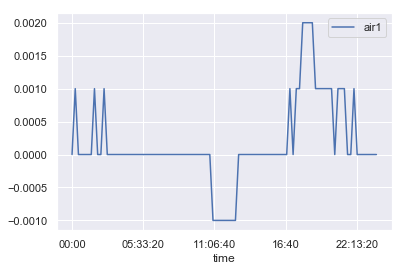

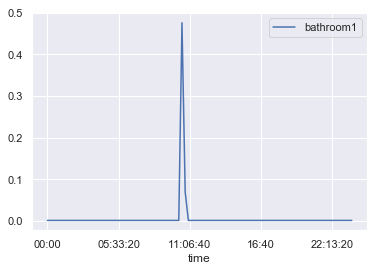

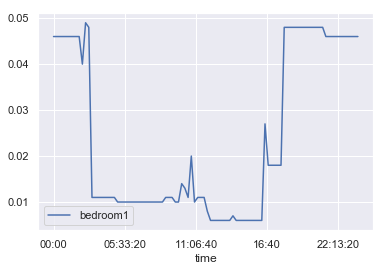

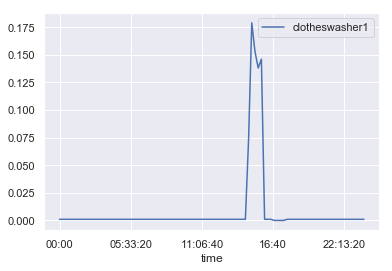

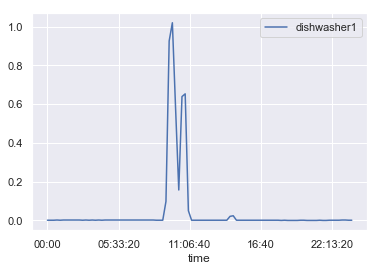

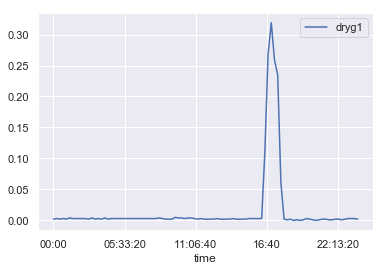

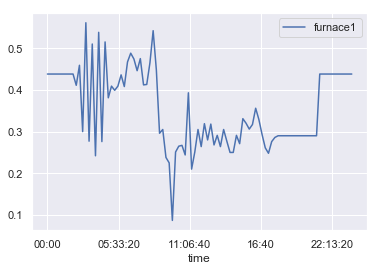

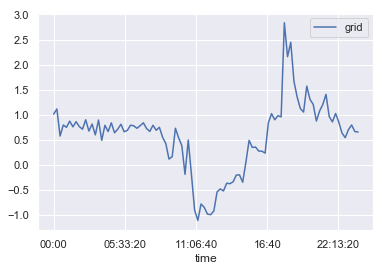

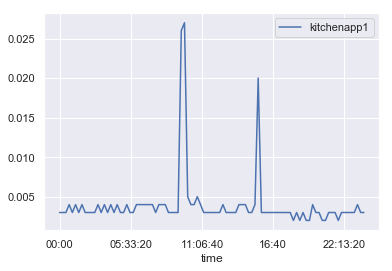

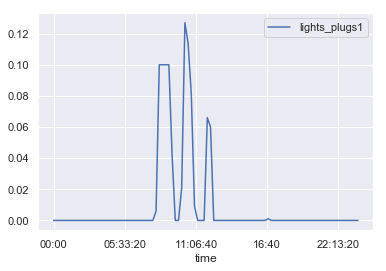

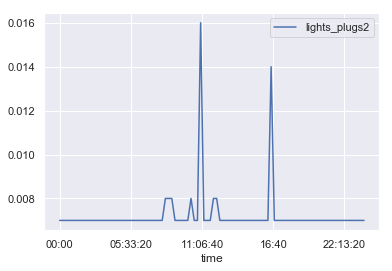

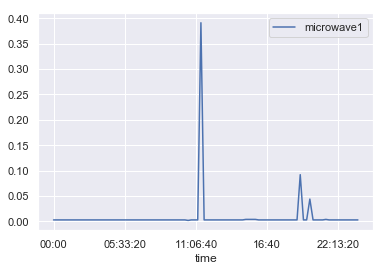

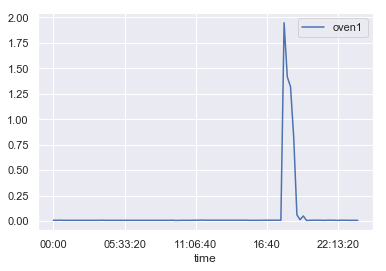

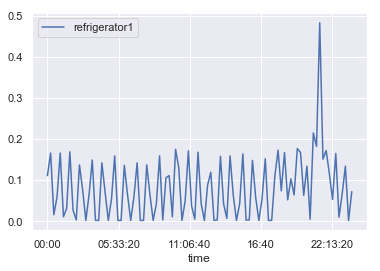

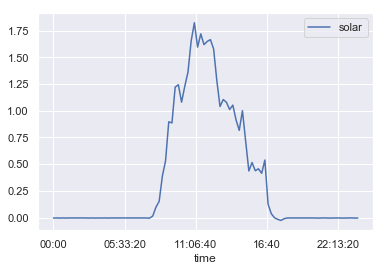

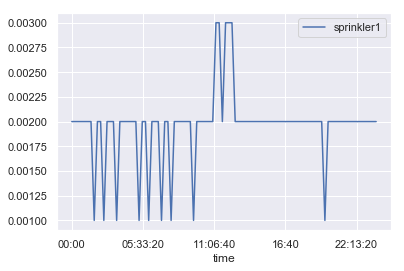

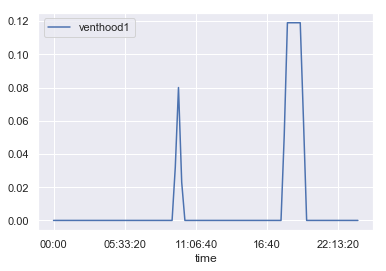

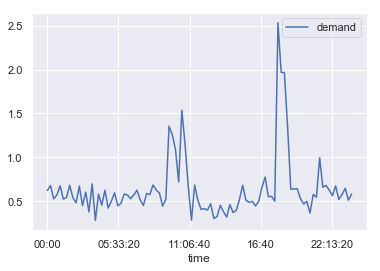

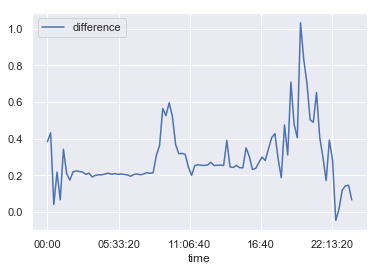

In [20]:
for column in dataframe_dict[2818].columns:
    try:
        plt.figure()
        dataframe_dict[2818].loc[pd.to_datetime('2018-01-01')][column].plot(legend = column)
        plt.show()
    except (ValueError, AttributeError) as e:
        pass

In [23]:
import random

In [63]:
community_size = len(dataframe_dict)

D_min = [0 for i in range(community_size)]
D_max = [dataframe_dict[i].demand.max() for i in dataframe_dict.keys()]

G_min = [0 for i in range(community_size)]
G_max = [dataframe_dict[i].grid.max() for i in dataframe_dict.keys()]

Kappa = [[10 for i in range(community_size)] for i in range(community_size)]

Cost = [[1 for i in range(community_size)] for i in range(community_size)]

#Building connections between the nodes

connection_matrix = [[np.random.choice([0,1], p = [0.7,0.3]) for i in range(community_size)] for i in range(community_size)]

for i in range(community_size):
    for j in range(community_size):
        connection_matrix[j][i] = connection_matrix[i][j]
        if i==j:
            connection_matrix[i][j] = 0


A_tilde = [random.uniform(0,1) for i in range(community_size)]
B_tilde = [random.uniform(0,1) for i in range(community_size)]

A = [random.uniform(0,1) for i in range(community_size)]
B = [random.uniform(0,1) for i in range(community_size)]
D = [random.uniform(0,1) for i in range(community_size)]

d_target = [random.uniform(0,8) for i in range(community_size)]
g_res = [random.uniform(0,3) for i in range(community_size)]

risk_aversion = [random.uniform(0,1) for i in range(community_size)]

players = list()
for i in range(community_size):
    players.append(Player(a=A[i], b=B[i], d=D[i], a_tilde = A_tilde[i], b_tilde = B_tilde[i],
                          Dmin = D_min[i], Dmax = D_max[i], Gmin = G_min[i], Gmax = G_max[i], D_target = d_target[i],
                          res_generation = g_res[i], C = Cost[i], kappa = Kappa[i], risk_attitude = risk_aversion[i]))

In [64]:
for i,player in enumerate(players):
    print(i)
    print(player.__dict__, '\n')

0
{'a': 0.16078653438980295, 'b': 0.780830711421388, 'd': 0.24040551080734351, 'a_tilde': 0.44845979498285293, 'b_tilde': 0.9793116787235296, 'Dmin': 0, 'Dmax': 9.172999999999998, 'Gmin': 0, 'Gmax': 8.552, 'D_target': 7.373664943589879, 'res_generation': 1.9584664044682496, 'risk_attitude': 0.924144979077851, 'C': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'kappa': [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]} 

1
{'a': 0.7970739995571631, 'b': 0.16376204228062086, 'd': 0.02816847854451132, 'a_tilde': 0.5809441434163554, 'b_tilde': 0.3080100136166043, 'Dmin': 0, 'Dmax': 10.128, 'Gmin': 0, 'Gmax': 8.293, 'D_target': 1.4472551366432382, 'res_generation': 2.4254966377558453, 'risk_attitude': 0.5935472329725732, 'C': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'kappa': [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]}

In [65]:
from amplpy import AMPL, Environment, DataFrame

ampl = AMPL(Environment("C:\\Users\\SHILOVI\\OneDrive - VITO\\Documents\\Python\\amplide.mswin64"))

ampl.read('C:\\Users\\SHILOVI\\OneDrive - VITO\\Documents\\Python\\Pecan_street\\centralized.mod')
ampl.readData('C:\\Users\\SHILOVI\\OneDrive - VITO\\Documents\\Python\\Pecan_street\\centralized.dat')

In [66]:
nodes = ampl.getSet('nodes').getValues().toList()
print(nodes)

['n_0', 'n_1', 'n_2', 'n_3', 'n_4', 'n_5', 'n_6', 'n_7', 'n_8', 'n_9', 'n_10', 'n_11', 'n_12', 'n_13', 'n_14', 'n_15', 'n_16', 'n_17', 'n_18', 'n_19', 'n_20', 'n_21', 'n_22', 'n_23', 'n_24']


In [67]:
kappa_dict = {}
cost_dict = {}
connection_dict = {}

for i in range(community_size):
    for j in range(community_size):
        kappa_dict.update({(nodes[i],nodes[j]): Kappa[i][j]})
        cost_dict.update({(nodes[i],nodes[j]): Cost[i][j]})
        connection_dict.update({(nodes[i],nodes[j]): connection_matrix[i][j]})

In [68]:
#setup the parameters used in AMPL
ampl.getParameter('D_min').setValues(D_min)
ampl.getParameter('D_max').setValues(D_max)
ampl.getParameter('G_min').setValues(G_min)
ampl.getParameter('G_max').setValues(G_max)

ampl.getParameter('D_t').setValues(d_target)
ampl.getParameter('G_d').setValues(g_res)

ampl.getParameter('gamma').setValues(Gamma)

ampl.getParameter('a').setValues(A)
ampl.getParameter('b').setValues(B)
ampl.getParameter('d').setValues(D)
ampl.getParameter('a_t').setValues(A_tilde)
ampl.getParameter('b_t').setValues(B_tilde)

ampl.getParameter('x').setValues(x_dict)
ampl.getParameter('cost').setValues(cost_dict)
ampl.getParameter('kappa').setValues(kappa_dict)
ampl.getParameter('connection_matrix').setValues(connection_dict)

TypeError: Size mismatch when assigning parameter values. Assigning array of 25 elements to a parameter with 0 values